In [1]:
import pandas as pd

In [2]:
seed=1234

In [3]:
#Abro el archivo con la informacion
#Normalizada
data = pd.read_csv('attritionDataWithDummyVarsAndNorm.csv')
#Sin normalizar
#data = pd.read_csv('attritionDataWithDummyVars.csv')

### Data split

In [4]:
y=data['Dummy_Attrition_Yes']
x=data.drop(['Dummy_Attrition_Yes'], axis=1)

In [5]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Dummy_JobRole_Research Director,Dummy_JobRole_Research Scientist,Dummy_JobRole_Sales Executive,Dummy_JobRole_Sales Representative,Dummy_MaritalStatus_Divorced,Dummy_MaritalStatus_Married,Dummy_MaritalStatus_Single,Dummy_Over18_Y,Dummy_OverTime_No,Dummy_OverTime_Yes
0,0.45,0.74,-1.01,-0.89,-1.70,-0.66,1.38,0.38,-0.06,1.15,...,0,0,1,0,0,0,1,1,0,1
1,1.32,-1.30,-0.15,-1.87,-1.70,0.25,-0.24,-1.03,-0.06,-0.66,...,0,1,0,0,0,1,0,1,1,0
2,0.01,1.41,-0.89,-0.89,-1.70,1.17,1.28,-1.03,-0.96,0.25,...,0,0,0,0,0,0,1,1,0,1
3,-0.43,1.46,-0.76,1.06,-1.69,1.17,-0.49,0.38,-0.96,0.25,...,0,1,0,0,0,1,0,1,0,1
4,-1.09,-0.52,-0.89,-1.87,-1.69,-1.58,-1.27,0.38,-0.96,-0.66,...,0,0,0,0,0,1,0,1,1,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed )

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,20)]
scores = []

for k in k_values:
    result = cross_val_score(KNeighborsClassifier(n_neighbors=k),x_train, y_train,cv=3,scoring="accuracy").mean()
    scores.append(result)
    
    
#cross_val_score
#
#‘accuracy’
#‘roc_auc’
#"f1_weighted"
# f1
#https://scikit-learn.org/stable/modules/model_evaluation.html    

[Text(0.5, 1.0, 'Score VS K'), Text(0.5, 0, 'K Values'), Text(0, 0.5, 'Score')]

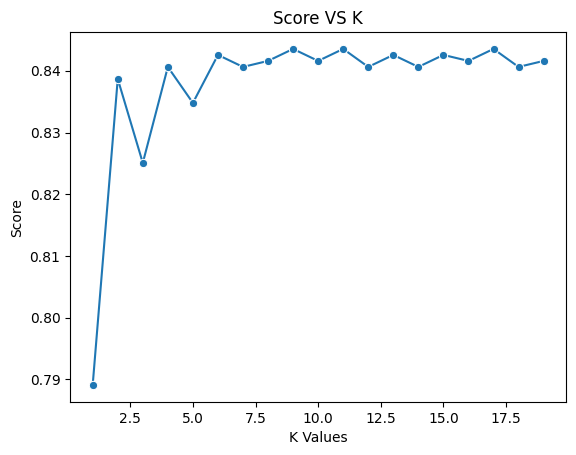

In [8]:
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o').set(title='Score VS K', xlabel="K Values", ylabel='Score')


In [9]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=8)

In [10]:
y_pred_train=model.predict(x_train)

In [11]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_pred_train)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[863   0]
 [157   9]]


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       863
           1       1.00      0.05      0.10       166

    accuracy                           0.85      1029
   macro avg       0.92      0.53      0.51      1029
weighted avg       0.87      0.85      0.79      1029



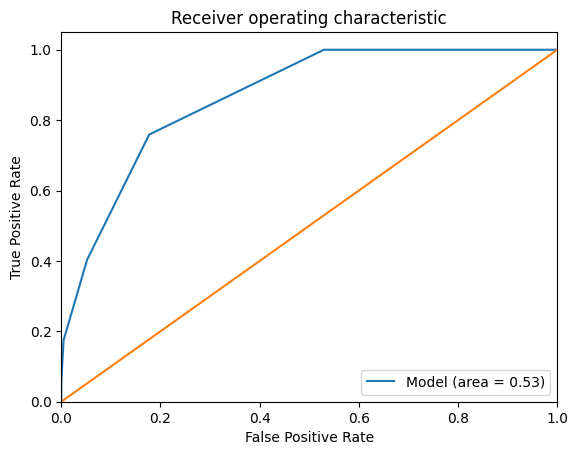

In [13]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_train, model.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

In [14]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[369   1]
 [ 65   6]]


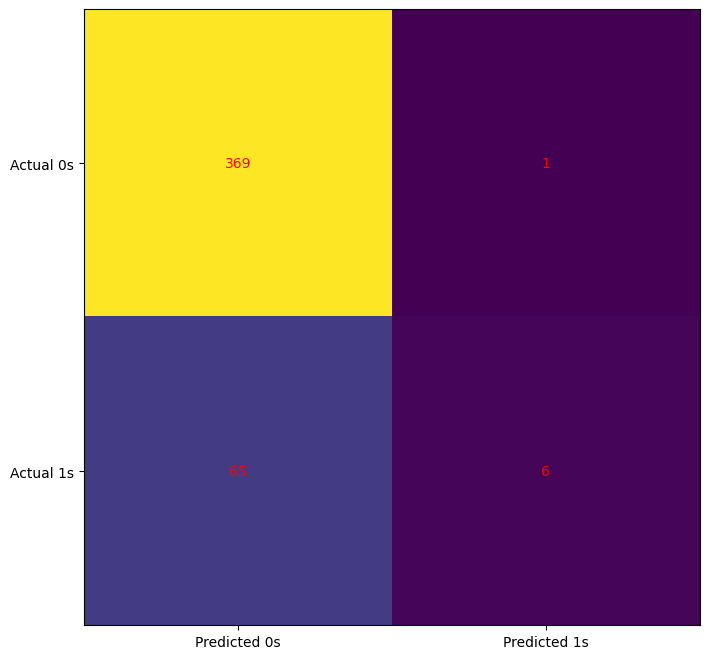

In [16]:
import matplotlib.pyplot as plt
cm = confusionMatrix

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is the ratio tp / (tp + fp) % of real positive over all the positives given by the algorithm
#recall is the ratio tp / (tp + fn) positive predictions over total positive
#Accuracy tp+tn/(tp+tn+fp+fn)
#Specificity= tn/tn+fp negative predictions over total positive

tn=confusionMatrix[0,0]
fp=confusionMatrix[0,1]
fn=confusionMatrix[1,0]
tp=confusionMatrix[1,1]

# Second line on output is the good one

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       370
           1       0.86      0.08      0.15        71

    accuracy                           0.85       441
   macro avg       0.85      0.54      0.54       441
weighted avg       0.85      0.85      0.79       441



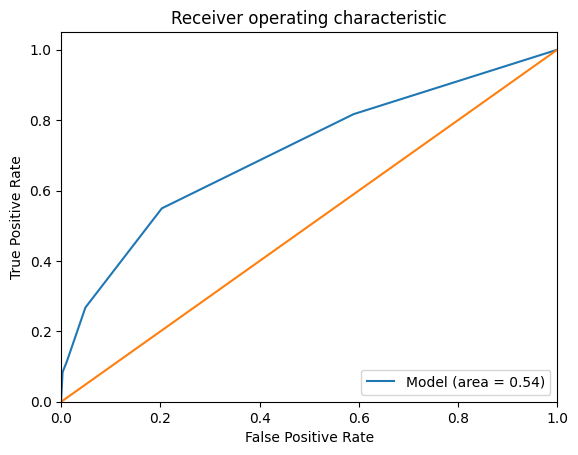

In [18]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

### Export results to CSV

In [19]:
aux=x_test
aux['predict']=y_pred
aux[['EmployeeNumber','predict']]

,EmployeeNumber,predict
298,-1.03,0
625,-0.27,0
1349,1.44,0
1361,1.48,0
343,-0.93,0
...,...,...
1395,1.56,0
305,-1.01,0
1256,1.22,0
553,-0.43,0


In [20]:
aux.to_csv('AttrttionResultsKneigh', index=False) 